In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('../data_samples/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [7]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [8]:
corr = df.corr()
corr.shape

(14, 14)

<Axes: >

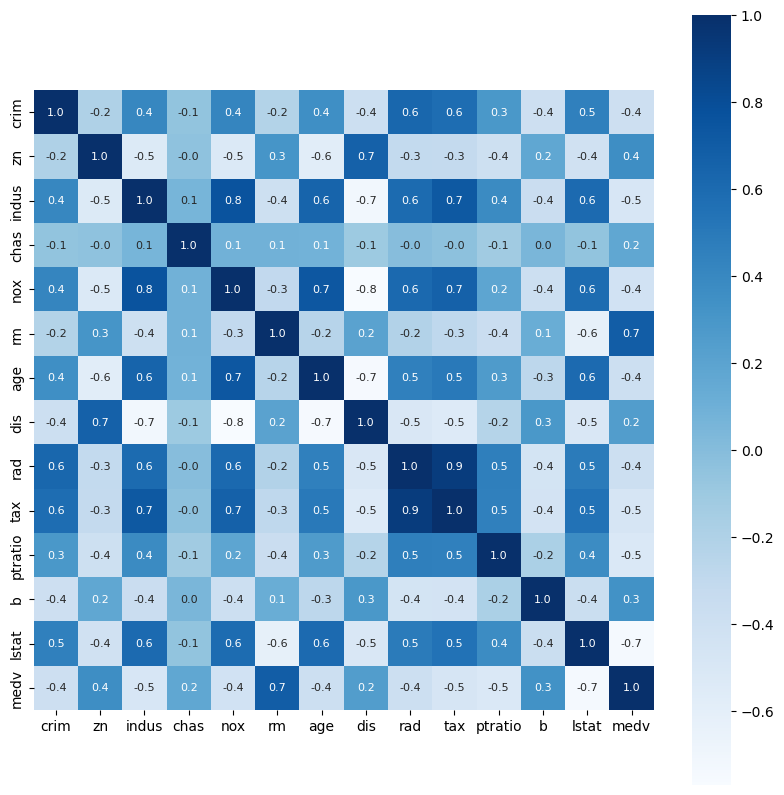

In [9]:
plt.figure(figsize=(10 , 10))
sns.heatmap(corr , cbar=True , square=True , fmt='.1f' , annot=True , annot_kws={'size':8} , cmap='Blues')

In [10]:
X = df[['rm']].values
y= df[['medv']].values


In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.intercept_

array([-33.85004607])

In [14]:
model.coef_

array([[8.96006106]])

In [15]:
y_pred = model.predict(X_test)
y_test.shape

(152, 1)

In [ ]:
print(f'r2 Score : {metrics.r2_score(y_test , y_pred)}')
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')

r2 Score : 0.5065734010320511
MAE : 4.853146476052217
MSE : 51.52364113002358
RMSE : np.sqrt(51.52364113002358)


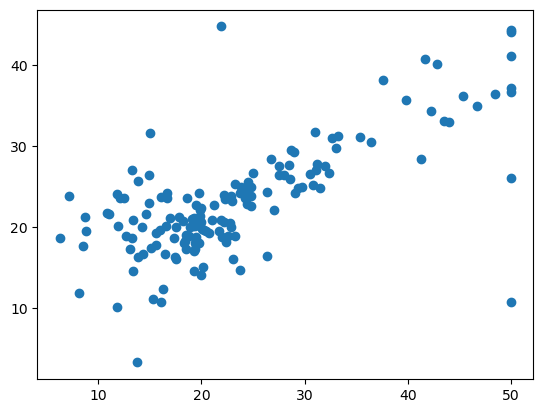

In [17]:
plt.scatter(y_test , y_pred)
plt.show()

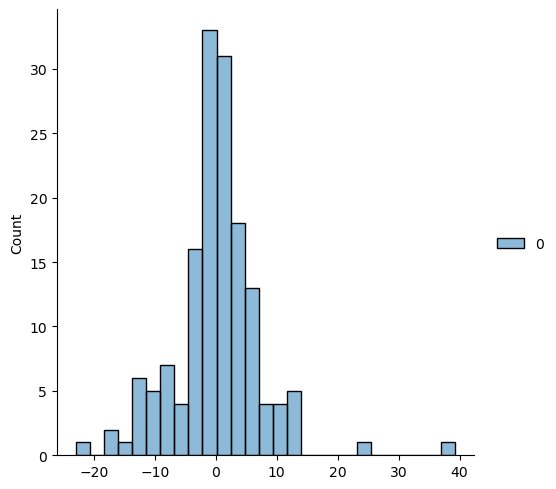

In [18]:
sns.displot(y_test - y_pred)
plt.show()

In [23]:
X= df.iloc[..., :-1]
y= df.iloc[..., -1]
y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [25]:

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=4)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
coefs = pd.DataFrame([X_train.columns , model.coef_]).T
coefs =coefs.rename( columns ={0: 'Atribute' , 1:'Coeefs'})
coefs

,Atribute,Coeefs
0,crim,-0.12257
1,zn,0.055678
2,indus,-0.008834
3,chas,4.693448
4,nox,-14.435783
5,rm,3.28008
6,age,-0.003448
7,dis,-1.552144
8,rad,0.32625
9,tax,-0.014067


In [28]:
y_pred = model.predict(X_test)

In [30]:
print(f'r2 Score : {metrics.r2_score(y_test , y_pred)}')
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')

r2 Score : 0.7121818377409188
MAE : 3.8590055923707482
MSE : 30.0539933071242
RMSE : 5.48215225136298


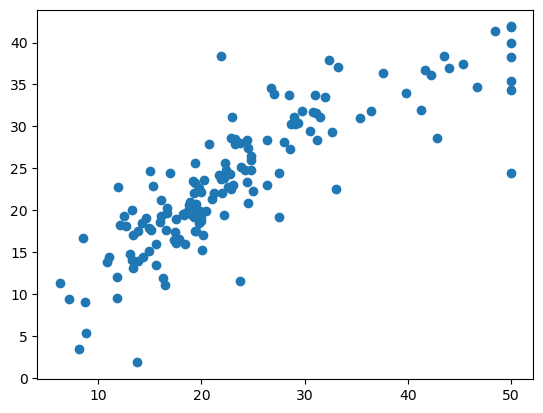

In [32]:
plt.scatter(y_test , y_pred)
plt.show()

In [35]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
y_pred = poly.predict(poly_features.transform(X_test))


In [36]:

print(f'r2 Score : {metrics.r2_score(y_test , y_pred)}')
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')

r2 Score : 0.8581336375408095
MAE : 2.633199061541269
MSE : 14.813695822352651
RMSE : 3.8488564304677113


In [39]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
y_pred = poly.predict(poly_features.transform(X_test))


In [40]:

print(f'r2 Score : {metrics.r2_score(y_test , y_pred)}')
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')

r2 Score : -119.095876433579
MAE : 62.75216298405044
MSE : 12540.42009794716
RMSE : 111.98401715399908
